$$ ITI \space AI-Pro: \space Intake \space 45 $$
$$ Machine \space Learning \space 1 $$
$$ Lab \space no. \space 3 $$

# `01` Import Necessary Libraries

## `i` Default Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed = 42

## `ii` Additional Libraries
Add imports for additional libraries you used throughout the notebook

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder ,LabelEncoder


from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras import Input
from keras.utils import set_random_seed

----------------------------

# `02` Load Data

Note: Make sure the `Data` folder attached with the notebook is in the same path for this cell to work properly.

[Dataset Link](https://www.kaggle.com/datasets/parisrohan/credit-score-classification)

In [ ]:
train = pd.read_csv(r'C:\Users\EL-Huda\Downloads\ITI\Machine Learning 1\labs\ML1_Lab_4 [Mans]\ML1_Lab_4 [Mans]\Data\train.csv')


C:\Users\EL-Huda\AppData\Local\Temp\ipykernel_12756\1263028339.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv(r'C:\Users\EL-Huda\Downloads\ITI\Machine Learning 1\labs\ML1_Lab_4 [Mans]\ML1_Lab_4 [Mans]\Data\train.csv')


----------------

# `03` Exploratory Data Analysis (EDA)

## `i` Simple Analysis

Preview data, perform statistical data analysis and explore as much as needed to better understand the data set we're dealing with.

`Notes:`
- Feel free to look up EDA approaches online for inspiration (however you **must understand** everything and not copy paste).
- Make sure to add notes and insights extracted from your analysis.


To see all columns

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
train.head(10)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
5,0x1607,CUS_0xd40,June,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",8,4,9.27,4.0,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172331195294,!@9#%8,340.4792117872438,Good
6,0x1608,CUS_0xd40,July,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,8_,11.27,4.0,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,Good
7,0x1609,CUS_0xd40,August,NaN,23,#F%$D@*&8,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,6,11.27,4.0,Good,809.98,23.933795,NaN,No,49.574949,24.785216509052056,High_spent_Medium_value_payments,358.12416760938714,Standard
8,0x160e,CUS_0x21b1,January,Rick Rothackerj,28_,004-07-5839,_______,34847.84,3037.986667,2,4,6,1,Credit-Builder Loan,3,4,5.42,2.0,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825168246,Low_spent_Small_value_payments,470.69062692529184,Standard
9,0x160f,CUS_0x21b1,February,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,4,6,1,Credit-Builder Loan,7,1,7.42,2.0,Good,605.03,38.550848,26 Years and 8 Months,No,18.816215,40.39123782853101,High_spent_Large_value_payments,484.5912142650067,Good


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

To display percentage null in each column

In [ ]:
train.isnull().sum()/train.shape[0]*100

ID                           0.000
Customer_ID                  0.000
Month                        0.000
Name                         9.985
Age                          0.000
SSN                          0.000
Occupation                   0.000
Annual_Income                0.000
Monthly_Inhand_Salary       15.002
Num_Bank_Accounts            0.000
Num_Credit_Card              0.000
Interest_Rate                0.000
Num_of_Loan                  0.000
Type_of_Loan                11.408
Delay_from_due_date          0.000
Num_of_Delayed_Payment       7.002
Changed_Credit_Limit         0.000
Num_Credit_Inquiries         1.965
Credit_Mix                   0.000
Outstanding_Debt             0.000
Credit_Utilization_Ratio     0.000
Credit_History_Age           9.030
Payment_of_Min_Amount        0.000
Total_EMI_per_month          0.000
Amount_invested_monthly      4.479
Payment_Behaviour            0.000
Monthly_Balance              1.200
Credit_Score                 0.000
dtype: float64

In [ ]:
train.shape

(100000, 28)

copy data to keep original data without any change  if i missed any thig

In [ ]:
df=train.copy()

In [ ]:
df

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",23,7,11.5,3.0,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",18,7,11.5,3.0,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,5729,2,"Auto Loan, and Student Loan",27,6,11.5,3.0,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",20,NaN,11.5,3.0,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979,Standard


# Handle Inconsistency

Drop columns that are not essential

In [ ]:
df.drop(['ID','Customer_ID','Name','SSN','Type_of_Loan'],axis=1,inplace=True)

convert age to numeric and mantain any different value and take absolute if is exist negative value according to logic

In [ ]:
df['Age'] = df['Age'].str.replace(r'(\d+)_', r'\1', regex=True)
df['Age'] = abs(pd.to_numeric(df['Age'], errors='coerce'))

In [ ]:
df['Age'].dtype

dtype('int64')

In [ ]:
df['Age'].isnull().sum()

0

Handle occupation column and replace and irregular value with null

In [ ]:
df['Occupation']=df['Occupation'].replace('_______',np.nan)
df['Occupation'].isnull().sum()

7062

In column Annual Income must handle irregural valures and take absolute because it is not logic to put annual income with negative values

In [ ]:
df['Annual_Income'] = df['Annual_Income'].str.replace(r'(\d+)_', r'\1', regex=True)
df['Annual_Income'] = abs(pd.to_numeric(df['Annual_Income'], errors='coerce'))

In column num of loan must handle irregural valures and take absolute because it is not logic to put number  with negative values

In [ ]:
df['Num_of_Loan'] = df['Num_of_Loan'].str.replace(r'(\d+)_', r'\1', regex=True)
df['Num_of_Loan'] = abs(pd.to_numeric(df['Num_of_Loan'], errors='coerce'))


it is not logic to put number of time wth negative values so must handle negative values in delay from due date column

In [ ]:

df['Delay_from_due_date'] = abs(df['Delay_from_due_date'])

it is not logic to put number of time wth negative values so must handle negative values in Num_of_Delayed_Payment

In [ ]:
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].str.replace(r'(\d+)_', r'\1', regex=True)
df['Num_of_Delayed_Payment'] = abs(pd.to_numeric(df['Num_of_Delayed_Payment'], errors='coerce'))

there are strong correlation between annual income and monthly inhand salary so we can each of other

In [ ]:
df.drop(['Monthly_Inhand_Salary'],inplace=True,axis=1)


Replace irregural values with nan

In [ ]:
df['Credit_Mix']=df['Credit_Mix'].replace('_',np.nan)
df['Credit_Mix'].isnull().sum()

20195

this column has inconsisten and negative values that is consider not logic so i maintain these values

In [ ]:
df['Outstanding_Debt'] = df['Outstanding_Debt'].str.replace(r'(\d+)_', r'\1', regex=True)
df['Outstanding_Debt'] = abs(pd.to_numeric(df['Outstanding_Debt'], errors='coerce'))

Also this column has inconsisten and negative values that is consider not logic so i maintain these values

In [ ]:
df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].str.replace(r'(\d+)_', r'\1', regex=True)
df['Changed_Credit_Limit'] = abs(pd.to_numeric(df['Changed_Credit_Limit'], errors='coerce'))

In [ ]:
df['Changed_Credit_Limit'].isnull().sum()

2091

I express about years using month and convert this column to numeric values

In [ ]:
df['Credit_History_Age'].dtype

dtype('O')

In [ ]:
def convert_to_months(text):
    if isinstance(text, str):
        parts = text.split(" and ")
        years = int(parts[0].split()[0])
        months = int(parts[1].split()[0])
        return years * 12 + months
    return None
df['Credit_History_Age']=df['Credit_History_Age'].apply(convert_to_months)

In [ ]:
df['Credit_History_Age']

0        265.0
1          NaN
2        267.0
3        268.0
4        269.0
         ...  
99995    378.0
99996    379.0
99997    380.0
99998    381.0
99999    382.0
Name: Credit_History_Age, Length: 100000, dtype: float64

we have two class in this feature yes or no and i dicovered value NM and replace it with null

In [ ]:
df['Payment_of_Min_Amount']=df['Payment_of_Min_Amount'].replace('NM',np.nan)

In [ ]:
df['Payment_of_Min_Amount'].value_counts()

Payment_of_Min_Amount
Yes    52326
No     35667
Name: count, dtype: int64

## Amount_invested_monthly

In [ ]:
df['Amount_invested_monthly'] = df['Amount_invested_monthly'].str.replace(r'(\d+)_', r'\1', regex=True)
df['Amount_invested_monthly'] = abs(pd.to_numeric(df['Amount_invested_monthly'], errors='coerce'))

in Payment_Behaviour coluumn are founded unkown values replace them with null

In [ ]:
def replace_null(text):
    if text=='!@9#%8':
        text=np.nan
    return text
df['Payment_Behaviour']=df['Payment_Behaviour'].apply(replace_null)

In [ ]:
df['Payment_Behaviour'].value_counts()

Payment_Behaviour
Low_spent_Small_value_payments      25513
High_spent_Medium_value_payments    17540
Low_spent_Medium_value_payments     13861
High_spent_Large_value_payments     13721
High_spent_Small_value_payments     11340
Low_spent_Large_value_payments      10425
Name: count, dtype: int64

Monthly_Balance,in this column should maintain inconsistent and negative values

In [ ]:
df['Monthly_Balance'] = df['Monthly_Balance'].str.replace(r'(\d+)_', r'\1', regex=True)
df['Monthly_Balance'] = abs(pd.to_numeric(df['Monthly_Balance'], errors='coerce'))

## check duplicates

In [ ]:
df.duplicated().sum()

0

## Statistical analysis

In [ ]:
df.describe()

,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,100000.000000,1.000000e+05,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,92998.000000,97909.000000,98035.000000,100000.000000,100000.000000,90970.000000,100000.000000,91216.000000,97123.000000
mean,119.509700,1.764157e+05,17.091280,22.47443,72.466040,10.761960,21.095040,30.946268,10.465678,27.754251,1426.220376,32.285173,221.195405,1403.118217,195.539456,402.164483
std,684.757313,1.429618e+06,117.404834,129.05741,466.422621,61.789933,14.822802,226.028754,6.670732,193.177339,1155.129026,5.116875,99.741364,8306.041270,199.564527,213.644217
min,14.000000,7.005930e+03,-1.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.230000,20.000000,1.000000,0.000000,0.000000,0.007760
25%,25.000000,1.945750e+04,3.000000,4.00000,8.000000,2.000000,10.000000,9.000000,5.350000,3.000000,566.072500,28.052567,144.000000,30.306660,72.236692,269.998334
50%,34.000000,3.757861e+04,6.000000,5.00000,13.000000,3.000000,18.000000,14.000000,9.400000,6.000000,1166.155000,32.305784,219.000000,69.249473,128.954538,336.472111
75%,42.000000,7.279092e+04,7.000000,7.00000,20.000000,6.000000,28.000000,18.000000,14.870000,9.000000,1945.962500,36.496663,302.000000,161.224249,236.815814,469.652004
max,8698.000000,2.419806e+07,1798.000000,1499.00000,5797.000000,1496.000000,67.000000,4397.000000,36.970000,2597.000000,4998.070000,50.000000,404.000000,82331.000000,1977.326102,1602.040519


## check data type

In [ ]:
df.dtypes

Month                        object
Age                           int64
Occupation                   object
Annual_Income               float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                   int64
Delay_from_due_date           int64
Num_of_Delayed_Payment      float64
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Credit_History_Age          float64
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour            object
Monthly_Balance             float64
Credit_Score                 object
dtype: object

check if data balanced or not

`insights:`
- there are unbalance in more feature and that make outlier and can mislead for model

In [ ]:
for col in df.select_dtypes('object').columns:
    print(df[col].value_counts())
    print("-----------------")

Month
January     12500
February    12500
March       12500
April       12500
May         12500
June        12500
July        12500
August      12500
Name: count, dtype: int64
-----------------
Occupation
Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6087
Journalist       6085
Manager          5973
Musician         5911
Writer           5885
Name: count, dtype: int64
-----------------
Credit_Mix
Standard    36479
Good        24337
Bad         18989
Name: count, dtype: int64
-----------------
Payment_of_Min_Amount
Yes    52326
No     35667
Name: count, dtype: int64
-----------------
Payment_Behaviour
Low_spent_Small_value_payments      25513
High_spent_Medium_value_payments    17540
Low_spent_Medium_value_payments     13861
High_spent_Large_value_payments     13721
High_spent_Small_value_payments   

## check `outlier` and maintain it with null values

In [ ]:

numeric_cols = df.select_dtypes(include=['number'])

Q1 = numeric_cols.quantile(0.25)
Q3 = numeric_cols.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_mask = (numeric_cols < lower_bound) | (numeric_cols > upper_bound)

df[numeric_cols.columns] = numeric_cols.mask(outliers_mask, np.nan)




## `ii` Visual Analysis

Plot graphs and relations in order to gain more insights about the data set, identify patterns, and make assumptions.

`Notes:`
- Feel free to look up visual EDA approaches online for inspiration (however you **must understand** everything and not copy paste).
- Make sure to add notes and insights extracted from your analysis.

### count label or target to know it is balanced or not

C:\Users\EL-Huda\AppData\Local\Temp\ipykernel_12756\397224395.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Credit_Score'],palette='bright')


<Axes: xlabel='Credit_Score', ylabel='count'>

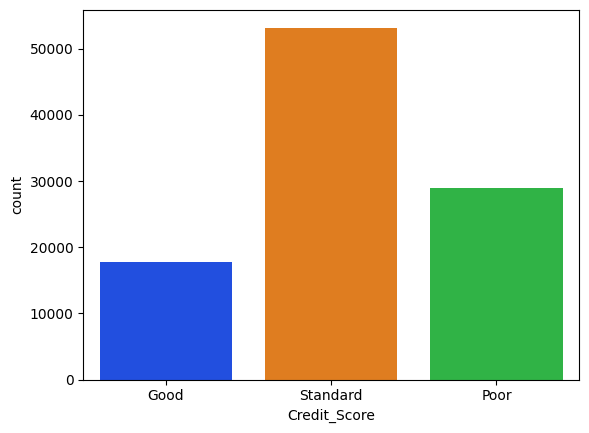

In [ ]:
sns.countplot(x=df['Credit_Score'],palette='bright')

### show if each feature correlated with label or not and have outlier or not

Age


C:\Users\EL-Huda\AppData\Local\Temp\ipykernel_12756\3873331344.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x=df['Credit_Score'],y=col,palette='bright')


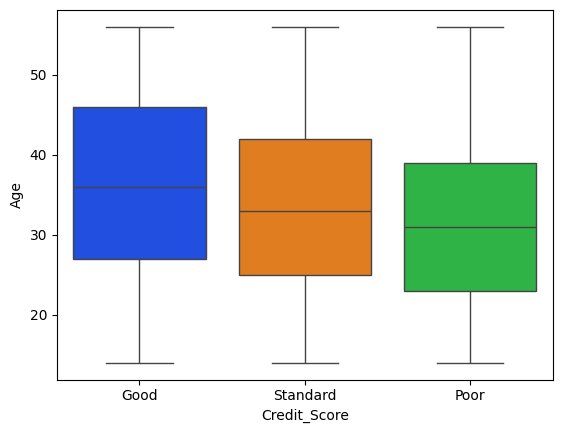

Annual_Income


C:\Users\EL-Huda\AppData\Local\Temp\ipykernel_12756\3873331344.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x=df['Credit_Score'],y=col,palette='bright')


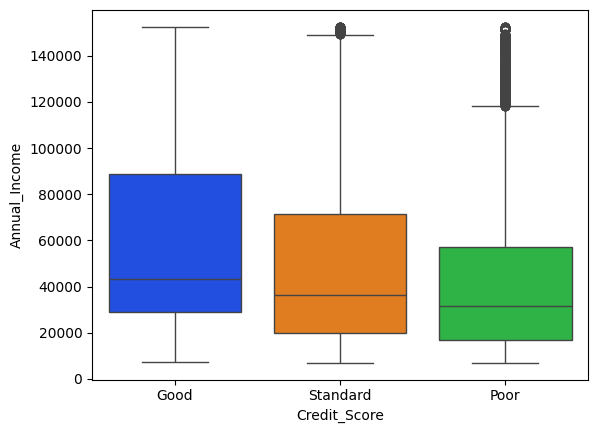

Num_Bank_Accounts


C:\Users\EL-Huda\AppData\Local\Temp\ipykernel_12756\3873331344.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x=df['Credit_Score'],y=col,palette='bright')


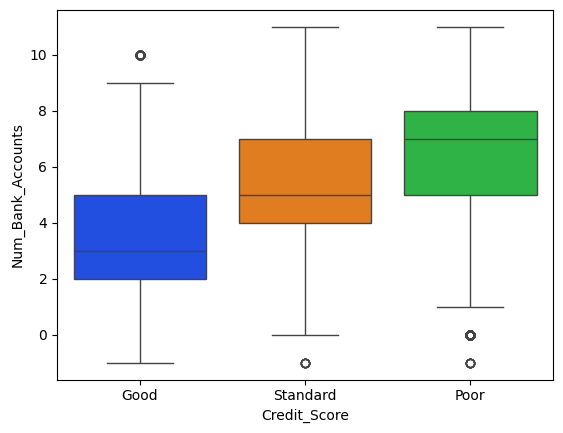

Num_Credit_Card


C:\Users\EL-Huda\AppData\Local\Temp\ipykernel_12756\3873331344.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x=df['Credit_Score'],y=col,palette='bright')


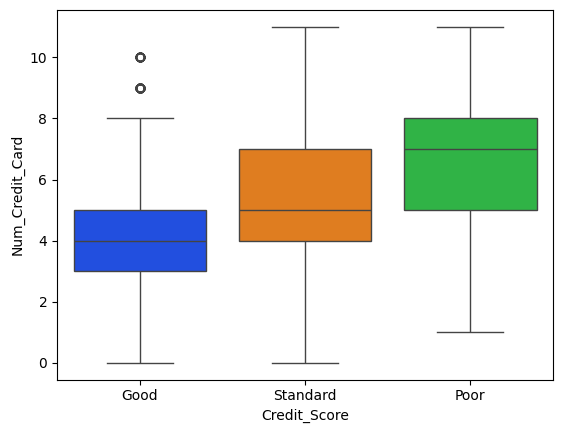

Interest_Rate


C:\Users\EL-Huda\AppData\Local\Temp\ipykernel_12756\3873331344.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x=df['Credit_Score'],y=col,palette='bright')


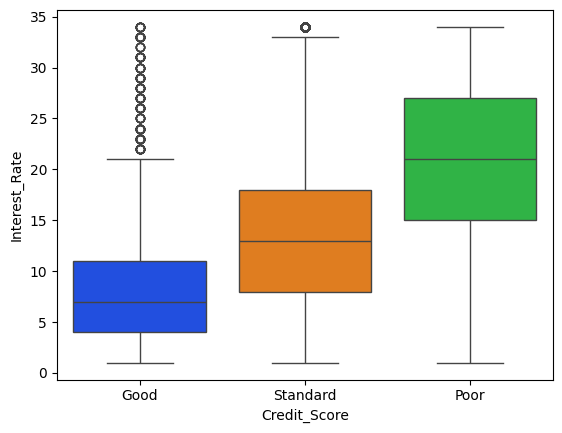

Num_of_Loan


C:\Users\EL-Huda\AppData\Local\Temp\ipykernel_12756\3873331344.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x=df['Credit_Score'],y=col,palette='bright')


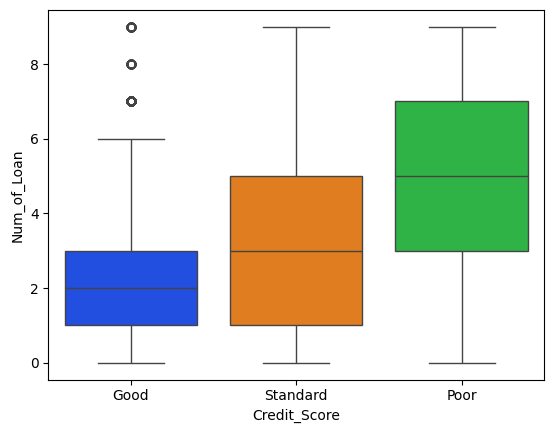

Delay_from_due_date


C:\Users\EL-Huda\AppData\Local\Temp\ipykernel_12756\3873331344.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x=df['Credit_Score'],y=col,palette='bright')


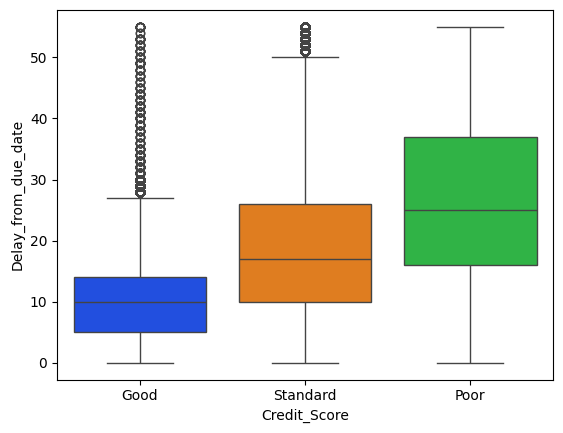

Num_of_Delayed_Payment


C:\Users\EL-Huda\AppData\Local\Temp\ipykernel_12756\3873331344.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x=df['Credit_Score'],y=col,palette='bright')


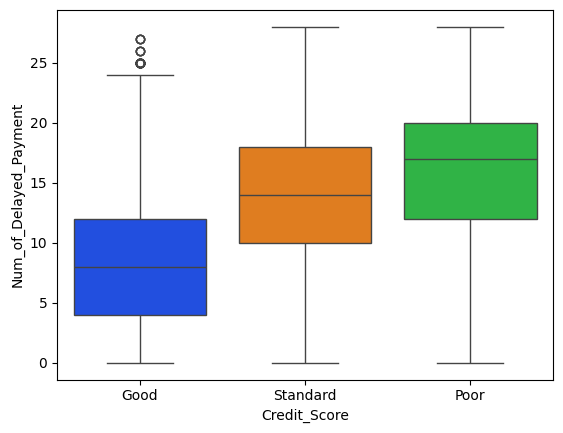

Changed_Credit_Limit


C:\Users\EL-Huda\AppData\Local\Temp\ipykernel_12756\3873331344.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x=df['Credit_Score'],y=col,palette='bright')


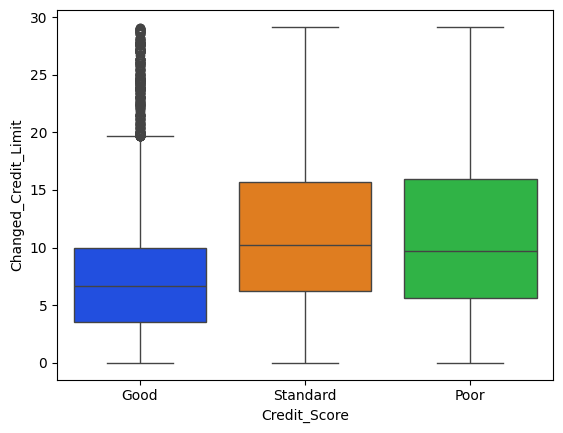

Num_Credit_Inquiries


C:\Users\EL-Huda\AppData\Local\Temp\ipykernel_12756\3873331344.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x=df['Credit_Score'],y=col,palette='bright')


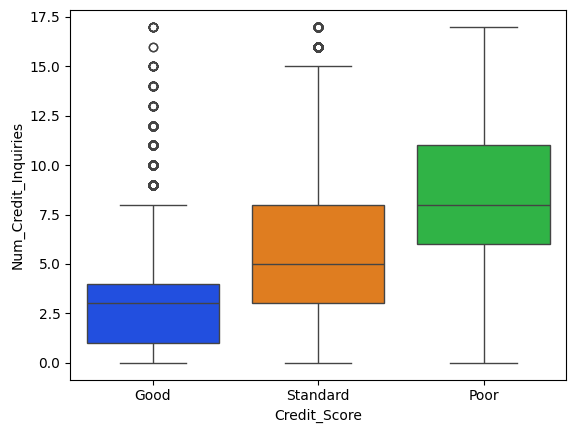

Outstanding_Debt


C:\Users\EL-Huda\AppData\Local\Temp\ipykernel_12756\3873331344.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x=df['Credit_Score'],y=col,palette='bright')


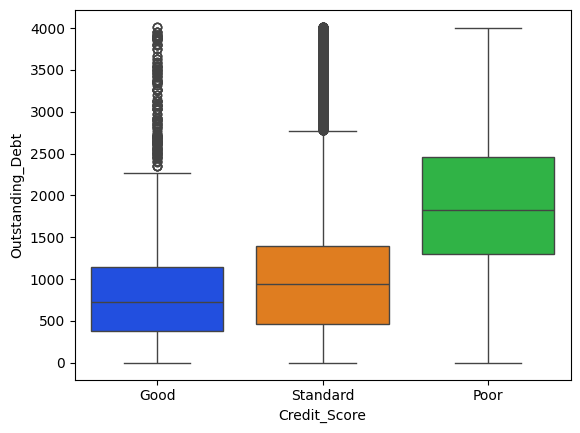

Credit_Utilization_Ratio


C:\Users\EL-Huda\AppData\Local\Temp\ipykernel_12756\3873331344.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x=df['Credit_Score'],y=col,palette='bright')


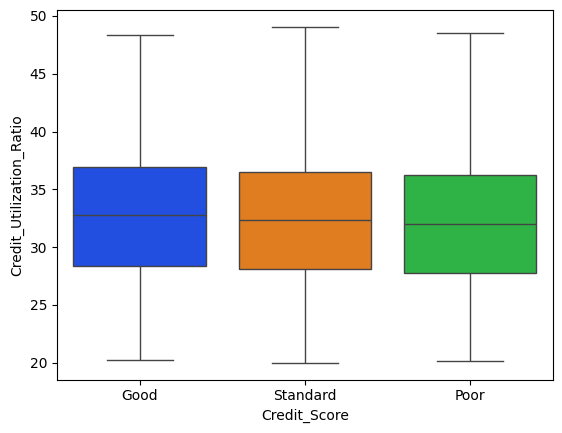

Credit_History_Age


C:\Users\EL-Huda\AppData\Local\Temp\ipykernel_12756\3873331344.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x=df['Credit_Score'],y=col,palette='bright')


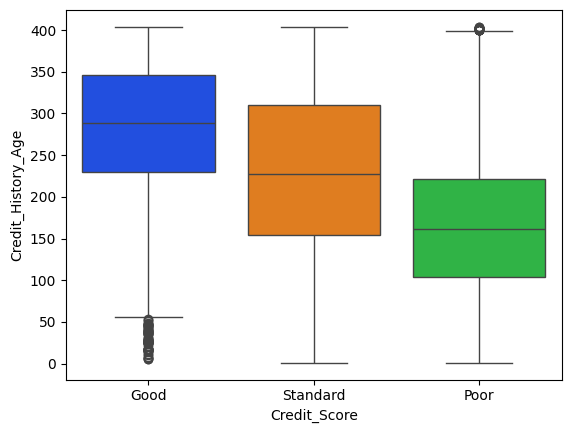

Total_EMI_per_month


C:\Users\EL-Huda\AppData\Local\Temp\ipykernel_12756\3873331344.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x=df['Credit_Score'],y=col,palette='bright')


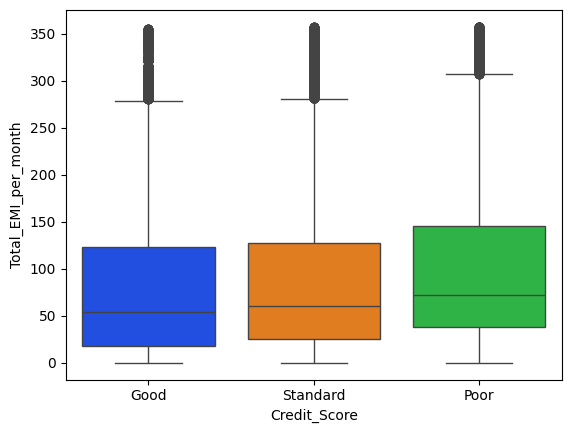

Amount_invested_monthly


C:\Users\EL-Huda\AppData\Local\Temp\ipykernel_12756\3873331344.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x=df['Credit_Score'],y=col,palette='bright')


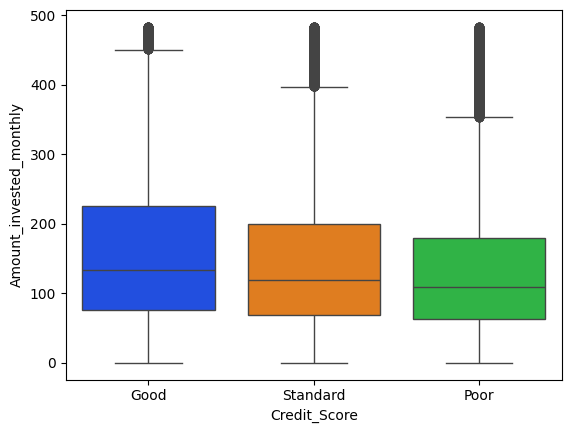

Monthly_Balance


C:\Users\EL-Huda\AppData\Local\Temp\ipykernel_12756\3873331344.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x=df['Credit_Score'],y=col,palette='bright')


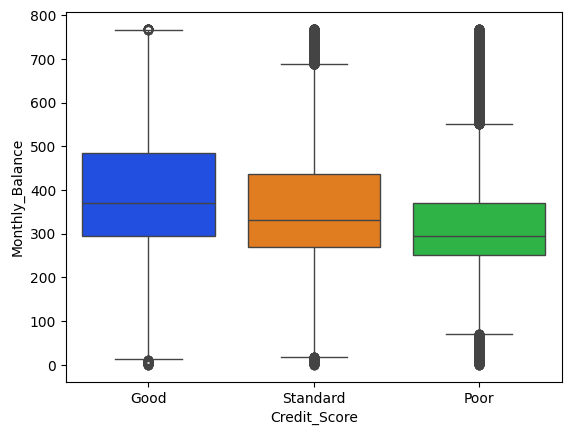

In [ ]:
for col in df.select_dtypes('number').columns:
    print(col)
    sns.boxplot(data=df,x=df['Credit_Score'],y=col,palette='bright')
    plt.show()

`insight`
- still there are some outlier we can handle it with scaling

Month


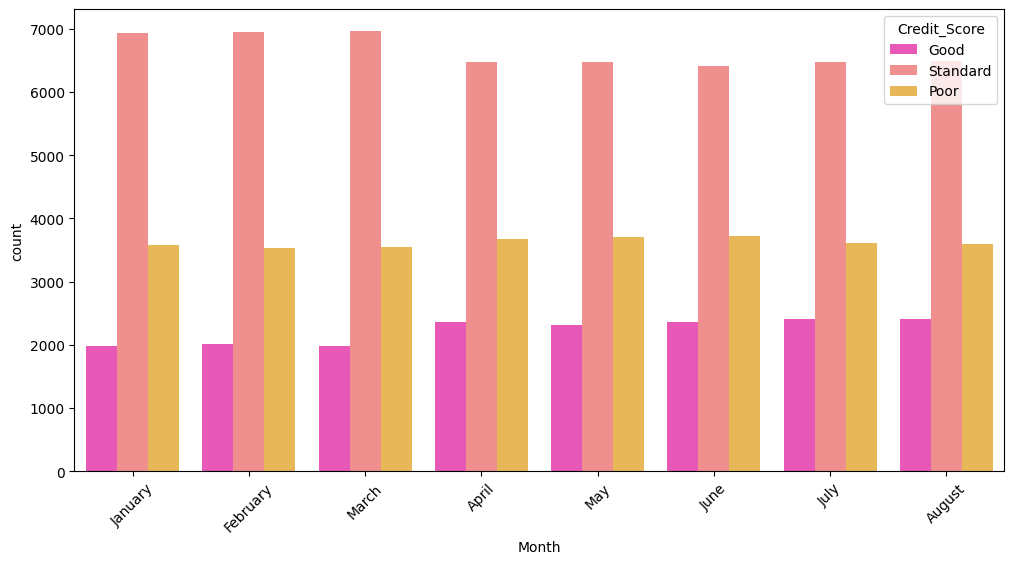

Occupation


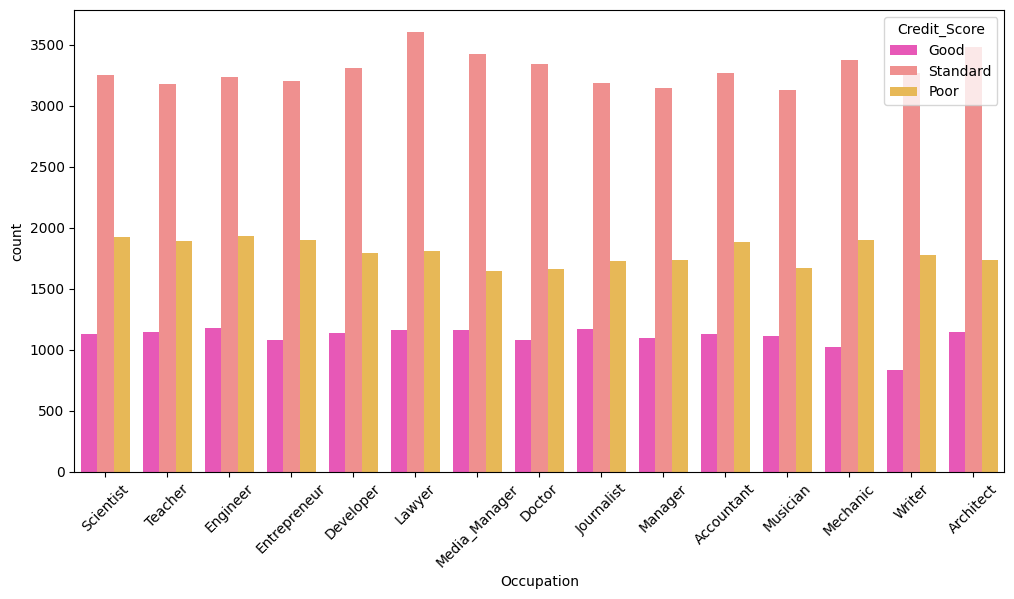

Credit_Mix


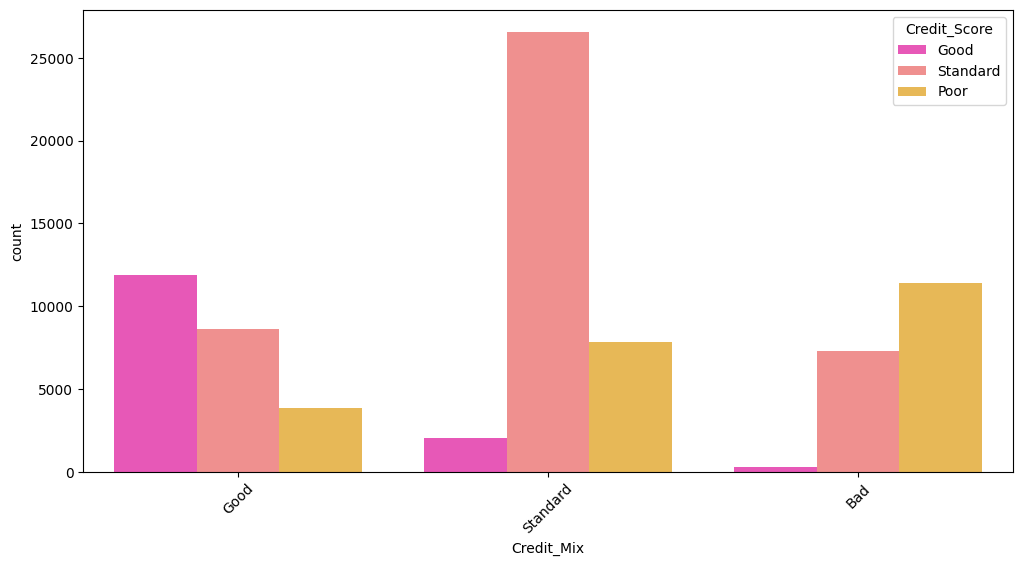

Payment_of_Min_Amount


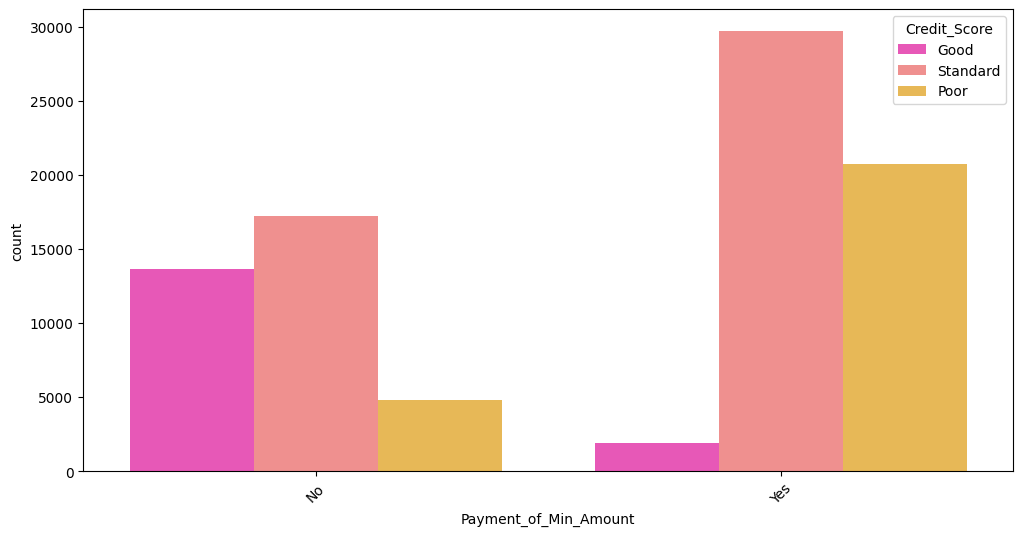

Payment_Behaviour


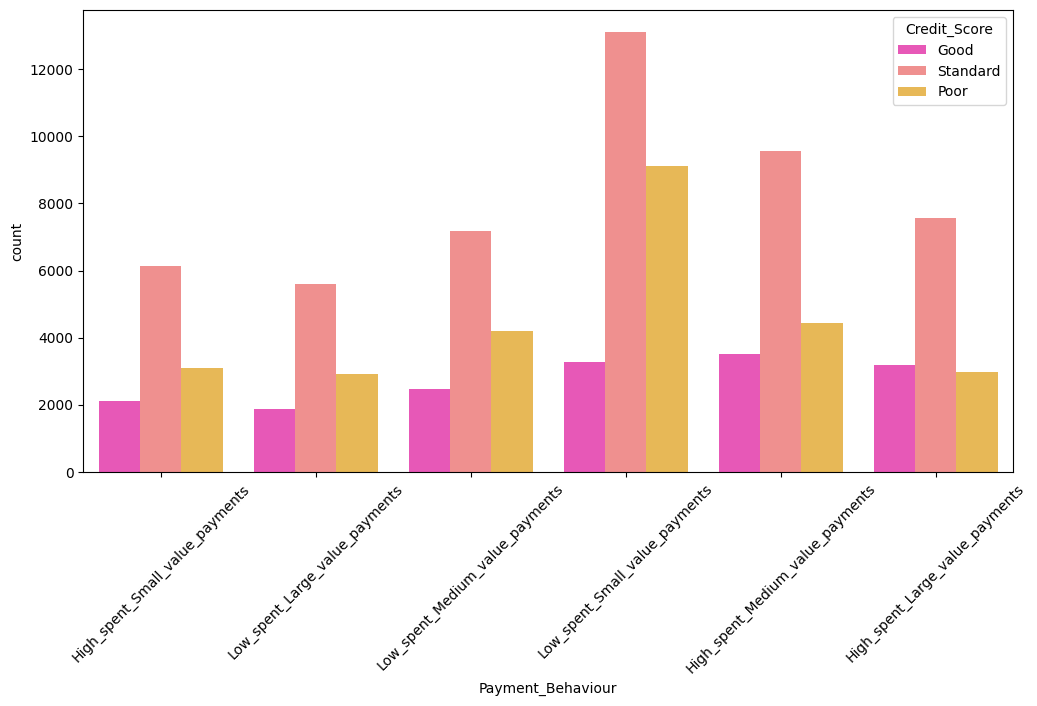

Credit_Score


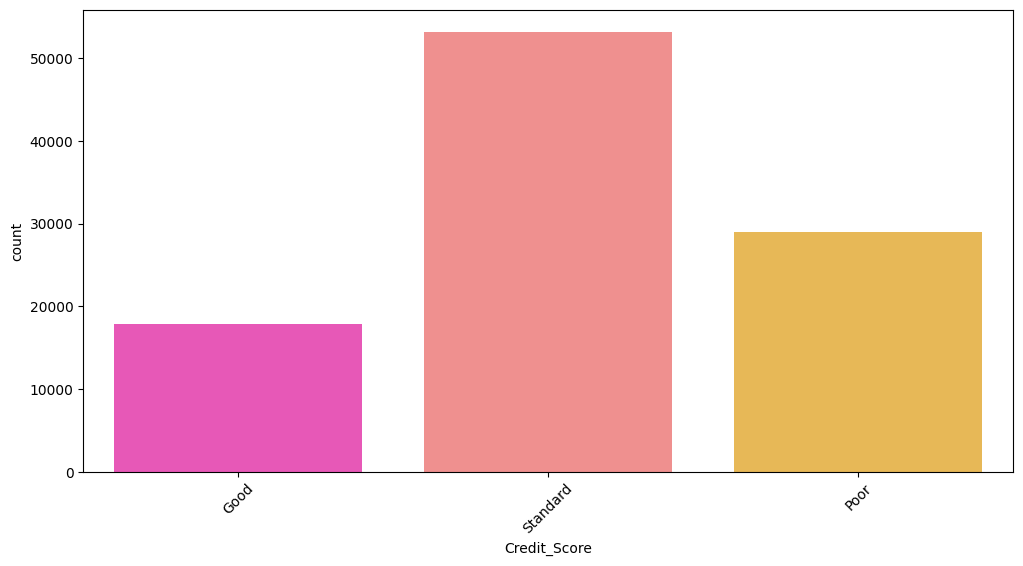

In [ ]:

for col in df.select_dtypes('object').columns:
    print(col)
    plt.figure(figsize=(12, 6))
    sns.countplot( x=df[col], hue=df['Credit_Score'], palette='spring')
    plt.xticks(rotation=45)
    plt.show()

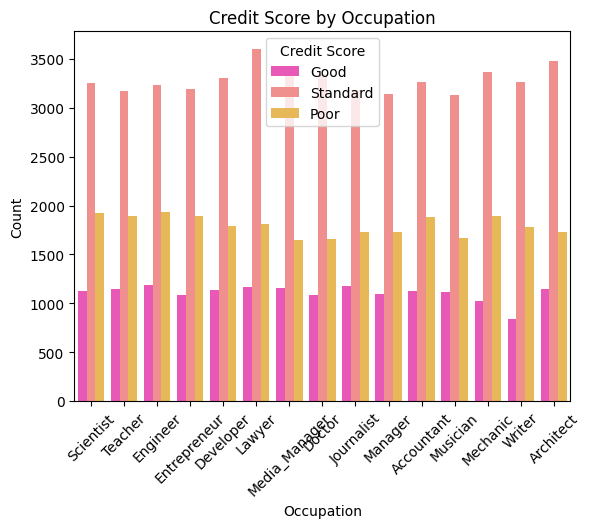

In [ ]:
sns.countplot(data=df, x='Occupation', hue='Credit_Score', palette='spring')

plt.title('Credit Score by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.legend(title='Credit Score')
plt.xticks(rotation=45)
plt.show()

In [ ]:
df

,Month,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,January,23.0,Scientist,19114.12,3.0,4.0,3.0,4.0,3.0,7.0,11.27,4.0,NaN,809.98,26.822620,265.0,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,February,23.0,Scientist,19114.12,3.0,4.0,3.0,4.0,1.0,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
2,March,NaN,Scientist,19114.12,3.0,4.0,3.0,4.0,3.0,7.0,NaN,4.0,Good,809.98,28.609352,267.0,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,April,23.0,Scientist,19114.12,3.0,4.0,3.0,4.0,5.0,4.0,6.27,4.0,Good,809.98,31.377862,268.0,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,May,23.0,Scientist,19114.12,3.0,4.0,3.0,4.0,6.0,NaN,11.27,4.0,Good,809.98,24.797347,269.0,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,April,25.0,Mechanic,39628.99,4.0,6.0,7.0,2.0,23.0,7.0,11.50,3.0,NaN,502.38,34.663572,378.0,No,35.104023,60.971333,High_spent_Large_value_payments,NaN,Poor
99996,May,25.0,Mechanic,39628.99,4.0,6.0,7.0,2.0,18.0,7.0,11.50,3.0,NaN,502.38,40.565631,379.0,No,35.104023,54.185950,High_spent_Medium_value_payments,NaN,Poor
99997,June,25.0,Mechanic,39628.99,4.0,6.0,NaN,2.0,27.0,6.0,11.50,3.0,Good,502.38,41.255522,380.0,No,35.104023,24.028477,High_spent_Large_value_payments,NaN,Poor
99998,July,25.0,Mechanic,39628.99,4.0,6.0,7.0,2.0,20.0,NaN,11.50,3.0,Good,502.38,33.638208,381.0,No,35.104023,251.672582,Low_spent_Large_value_payments,NaN,Standard


----------------

# `04` Data Preparation

Perform data cleaning, feature engineering, scaling, dropping unwanted columns (such as IDs), etc. as needed to make sure it's ready for the model.

`Q` Is this dataset *skewed*?
- ` yes, there some features have skewed distribution`

Hint: It could be helpful to check `sklearn.preprocessing` module.

# split data

In [ ]:
y=df['Credit_Score']
X=df.drop(['Credit_Score'],axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1234)
X_train,X_valid,y_train,y_valid=train_test_split(X_train,y_train,test_size=0.2/0.8,random_state=1234)

In [ ]:
print("Shape X_train : ",X_train.shape)
print("Shape X_valid : ",X_valid.shape)
print("Shape X_test : ",X_test.shape)
print("Shape y_train : ",y_train.shape)
print("Shape y_valid : ",y_valid.shape)
print("Shape y_test : ",y_test.shape)

Shape X_train :  (60000, 21)
Shape X_valid :  (20000, 21)
Shape X_test :  (20000, 21)
Shape y_train :  (60000,)
Shape y_valid :  (20000,)
Shape y_test :  (20000,)


# Encoding categorical data

# Encoding target

In [ ]:
from sklearn.preprocessing import LabelEncoder
y_train=pd.DataFrame(y_train)
label_encoder=LabelEncoder()
y_train = label_encoder.fit_transform(y_train)

c:\Users\EL-Huda\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
y_train.shape

(60000,)

# Encoding Feature

In [ ]:
ordinal_feature=['Month','Credit_Mix','Payment_of_Min_Amount','Payment_Behaviour','Occupation']

ordinal_feature_encoder=OrdinalEncoder()

X_train[ordinal_feature] = ordinal_feature_encoder.fit_transform(X_train[ordinal_feature])

In [ ]:
X_train

,Month,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
57148,7.0,27.0,14.0,113105.10,4.0,3.0,12.0,1.0,2.0,3.0,7.47,5.0,1.0,1037.47,41.905957,222.0,0.0,50.326679,170.792640,0.0,NaN
25087,1.0,20.0,NaN,45941.28,6.0,4.0,4.0,3.0,30.0,20.0,1.57,7.0,1.0,1279.96,39.666607,340.0,0.0,80.894862,146.371284,3.0,443.377854
76995,0.0,30.0,13.0,117801.12,5.0,4.0,6.0,6.0,5.0,13.0,11.40,4.0,2.0,1280.57,27.032120,180.0,1.0,326.206681,168.690033,0.0,743.979285
48220,7.0,33.0,7.0,12426.29,5.0,4.0,13.0,3.0,27.0,NaN,14.14,10.0,2.0,1399.81,37.311152,104.0,1.0,18.801898,85.787160,5.0,279.363358
6264,3.0,46.0,2.0,82065.16,5.0,5.0,3.0,3.0,12.0,10.0,5.55,1.0,1.0,106.83,42.130135,275.0,0.0,180.340607,133.097075,1.0,613.738651
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37382,4.0,19.0,8.0,43430.88,6.0,4.0,12.0,1.0,20.0,16.0,8.54,4.0,NaN,1288.94,33.298253,217.0,0.0,20.440818,78.595385,0.0,482.787797
53326,4.0,27.0,9.0,35938.45,3.0,5.0,15.0,4.0,18.0,14.0,7.84,3.0,2.0,1438.83,25.274176,249.0,0.0,96.960855,169.935478,2.0,276.190750
95478,4.0,28.0,8.0,110692.47,4.0,6.0,18.0,6.0,5.0,9.0,12.33,6.0,2.0,1134.69,30.018128,111.0,1.0,NaN,223.279596,NaN,557.081826
80955,0.0,33.0,NaN,38299.84,8.0,8.0,29.0,7.0,NaN,10.0,13.58,6.0,NaN,1512.31,32.237366,161.0,1.0,124.767692,NaN,5.0,393.697876


# Handle outliers

In [ ]:
Q1 = X_train.quantile(0.25)
Q3 = X_train.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_mask = (X_train < lower_bound) | (X_train> upper_bound)

outlier_counts = outliers_mask.sum(axis=0)

total_rows = X_train.shape[0]
outlier_percentage = (outlier_counts / total_rows) * 100

outliers_summary = pd.DataFrame({
    "Number of Outliers": outlier_counts,
    "Outlier Percentage": outlier_percentage
})

outliers_summary.style.background_gradient()

,Number of Outliers,Outlier Percentage
Month,0,0.000000
Age,0,0.000000
Occupation,0,0.000000
Annual_Income,381,0.635000
Num_Bank_Accounts,0,0.000000
Num_Credit_Card,0,0.000000
Interest_Rate,0,0.000000
Num_of_Loan,0,0.000000
Delay_from_due_date,1015,1.691667
Num_of_Delayed_Payment,0,0.000000


In [ ]:



outlier_columns = [
    'Annual_Income', 'Delay_from_due_date', 'Changed_Credit_Limit',
    'Num_Credit_Inquiries', 'Outstanding_Debt', 'Total_EMI_per_month',
    'Amount_invested_monthly', 'Monthly_Balance'
]

def replace_outliers_with_nan(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[col] = df[col].apply(lambda x: np.nan if (x < lower_bound or x > upper_bound) else x)


replace_outliers_with_nan(df, outlier_columns)

df.isna().sum()


Month                           0
Age                          2781
Occupation                   7062
Annual_Income                3407
Num_Bank_Accounts            1315
Num_Credit_Card              2271
Interest_Rate                2034
Num_of_Loan                  4348
Delay_from_due_date          5771
Num_of_Delayed_Payment       7738
Changed_Credit_Limit         3160
Num_Credit_Inquiries         4355
Credit_Mix                  20195
Outstanding_Debt             8768
Credit_Utilization_Ratio        4
Credit_History_Age           9030
Payment_of_Min_Amount       12007
Total_EMI_per_month          9698
Amount_invested_monthly     19687
Payment_Behaviour            7600
Monthly_Balance             14437
Credit_Score                    0
dtype: int64

## Handling Missing values

In [ ]:
X_train.columns

Index(['Month', 'Age', 'Occupation', 'Annual_Income', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance'],
      dtype='object')

In [ ]:
from sklearn.impute import KNNImputer
min_payments_imputer = KNNImputer()
X_train[X_train.columns]= min_payments_imputer.fit_transform(X_train[X_train.columns])

In [ ]:
X_train

,Month,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
57148,7.0,27.0,14.0,113105.10,4.0,3.0,12.0,1.0,2.0,3.0,7.47,5.0,1.0,1037.47,41.905957,222.0,0.0,50.326679,170.792640,0.0,336.154580
25087,1.0,20.0,10.4,45941.28,6.0,4.0,4.0,3.0,30.0,20.0,1.57,7.0,1.0,1279.96,39.666607,340.0,0.0,80.894862,146.371284,3.0,443.377854
76995,0.0,30.0,13.0,117801.12,5.0,4.0,6.0,6.0,5.0,13.0,11.40,4.0,2.0,1280.57,27.032120,180.0,1.0,326.206681,168.690033,0.0,743.979285
48220,7.0,33.0,7.0,12426.29,5.0,4.0,13.0,3.0,27.0,18.0,14.14,10.0,2.0,1399.81,37.311152,104.0,1.0,18.801898,85.787160,5.0,279.363358
6264,3.0,46.0,2.0,82065.16,5.0,5.0,3.0,3.0,12.0,10.0,5.55,1.0,1.0,106.83,42.130135,275.0,0.0,180.340607,133.097075,1.0,613.738651
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37382,4.0,19.0,8.0,43430.88,6.0,4.0,12.0,1.0,20.0,16.0,8.54,4.0,1.2,1288.94,33.298253,217.0,0.0,20.440818,78.595385,0.0,482.787797
53326,4.0,27.0,9.0,35938.45,3.0,5.0,15.0,4.0,18.0,14.0,7.84,3.0,2.0,1438.83,25.274176,249.0,0.0,96.960855,169.935478,2.0,276.190750
95478,4.0,28.0,8.0,110692.47,4.0,6.0,18.0,6.0,5.0,9.0,12.33,6.0,2.0,1134.69,30.018128,111.0,1.0,171.610861,223.279596,2.4,557.081826
80955,0.0,33.0,10.6,38299.84,8.0,8.0,29.0,7.0,23.8,10.0,13.58,6.0,1.6,1512.31,32.237366,161.0,1.0,124.767692,71.751348,5.0,393.697876


In [ ]:
X_train.isnull().sum()

Month                       0
Age                         0
Occupation                  0
Annual_Income               0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
dtype: int64

## Scaling Data

In [ ]:
X_train.isnull().sum()

Month                       0
Age                         0
Occupation                  0
Annual_Income               0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np

feature=[
    'Age', 'Annual_Income', 'Num_Bank_Accounts', 'Num_Credit_Card',
    'Num_of_Loan', 'Interest_Rate', 'Delay_from_due_date',
    'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
    'Num_Credit_Inquiries', 'Outstanding_Debt', 'Total_EMI_per_month',
    'Amount_invested_monthly', 'Monthly_Balance'
]

Quantile_transformer =StandardScaler()


X_train[feature] =Quantile_transformer.fit_transform(X_train[feature])

### visualize distribution after scaling and fillna

Month


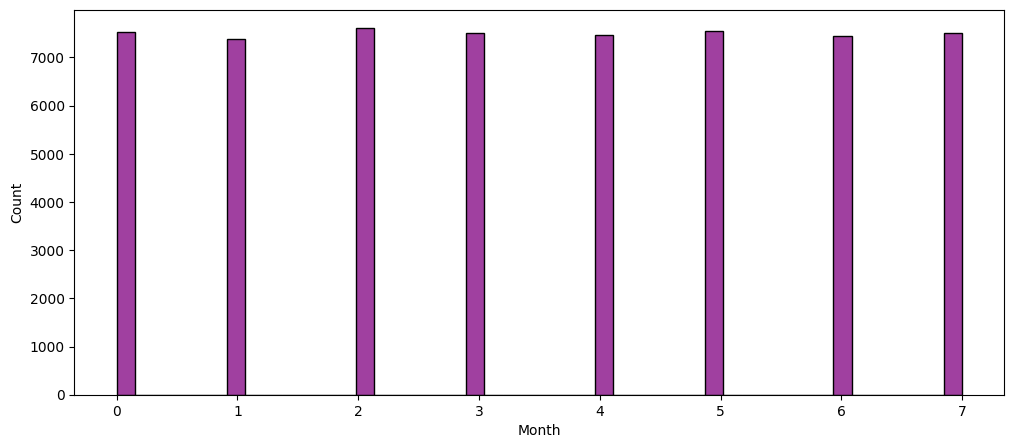

Age


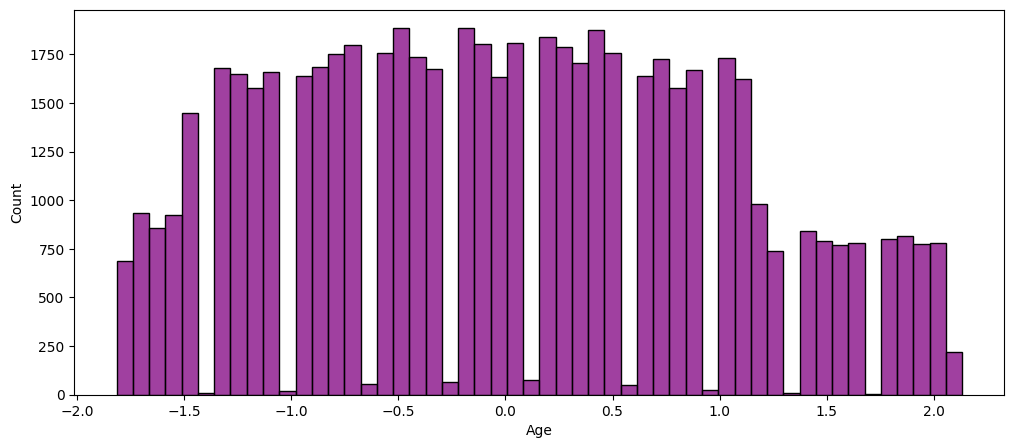

Occupation


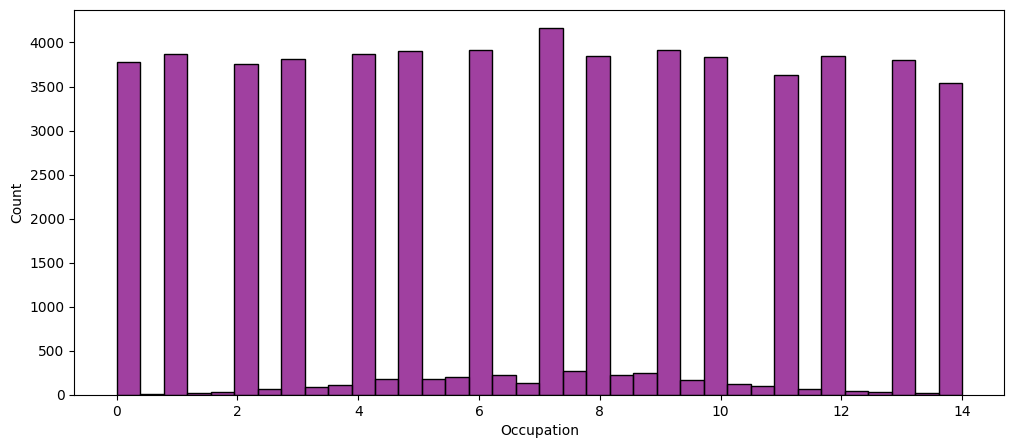

Annual_Income


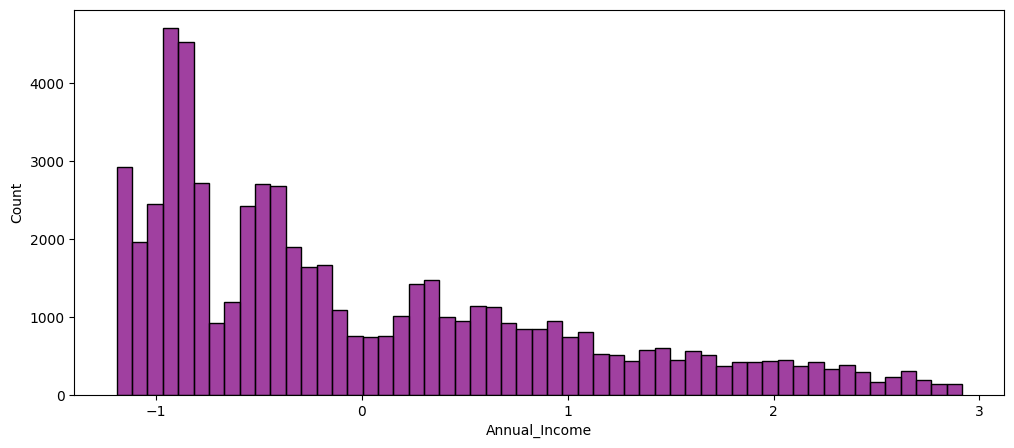

Num_Bank_Accounts


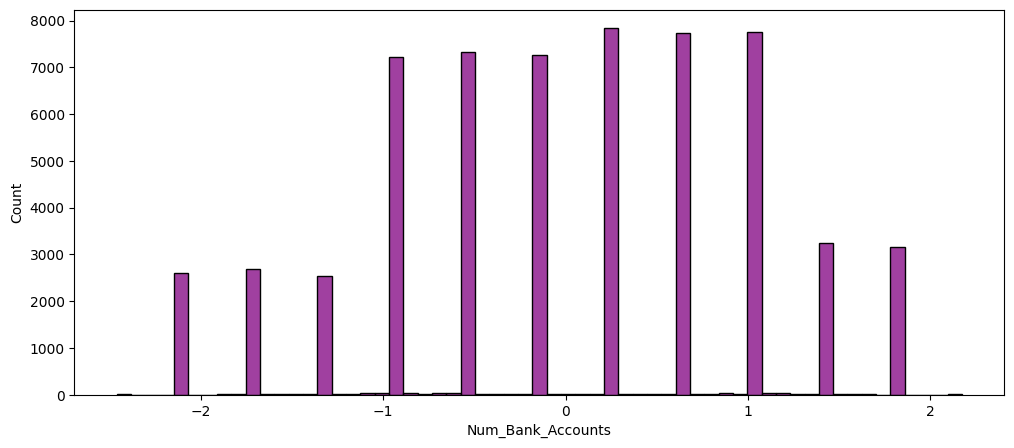

Num_Credit_Card


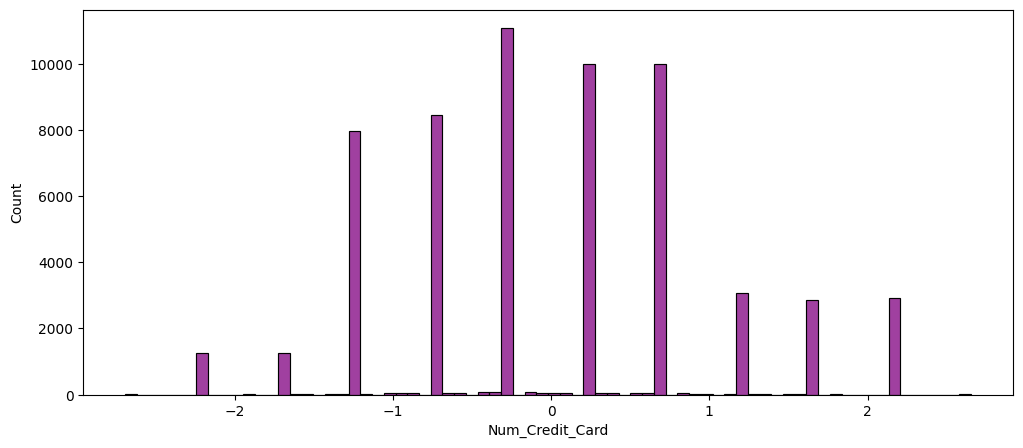

Interest_Rate


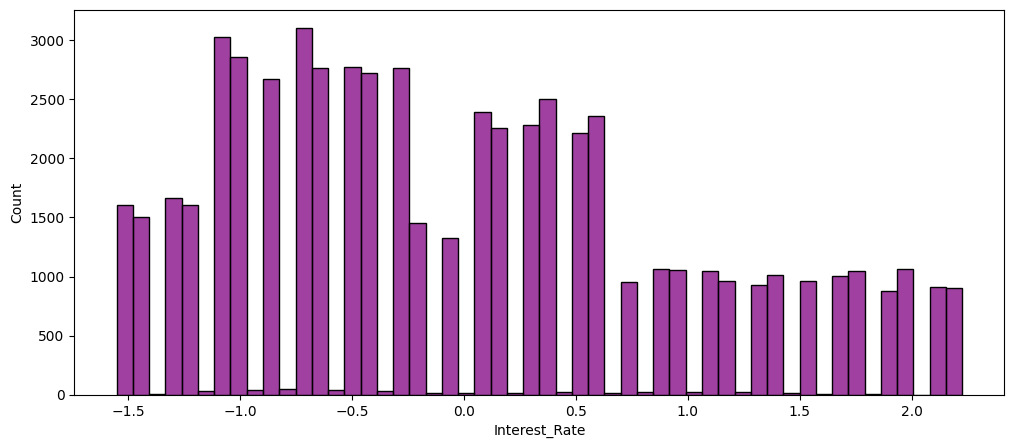

Num_of_Loan


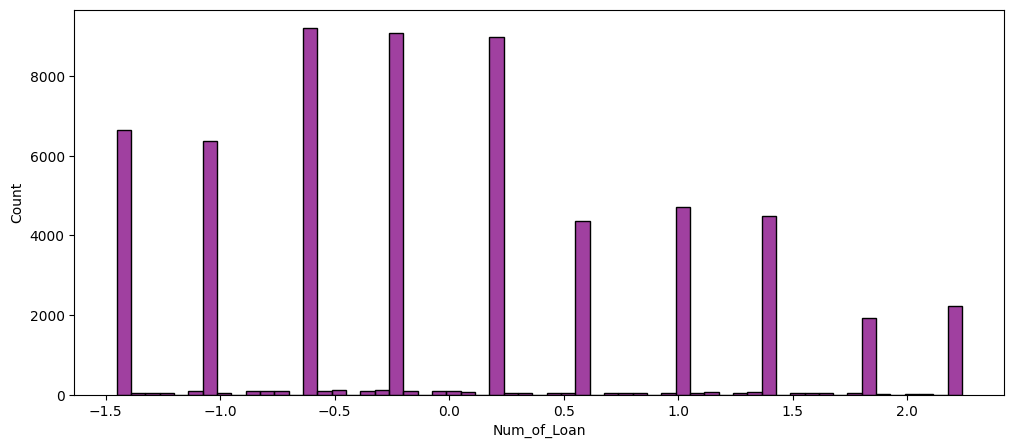

Delay_from_due_date


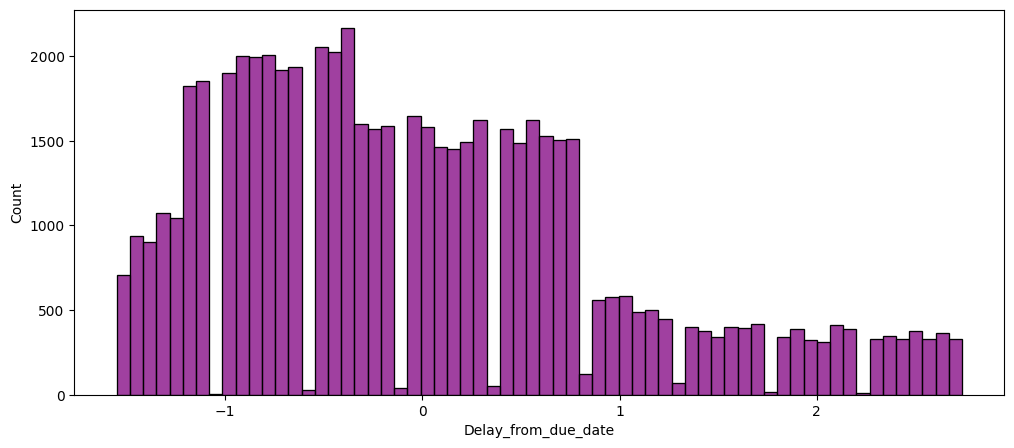

Num_of_Delayed_Payment


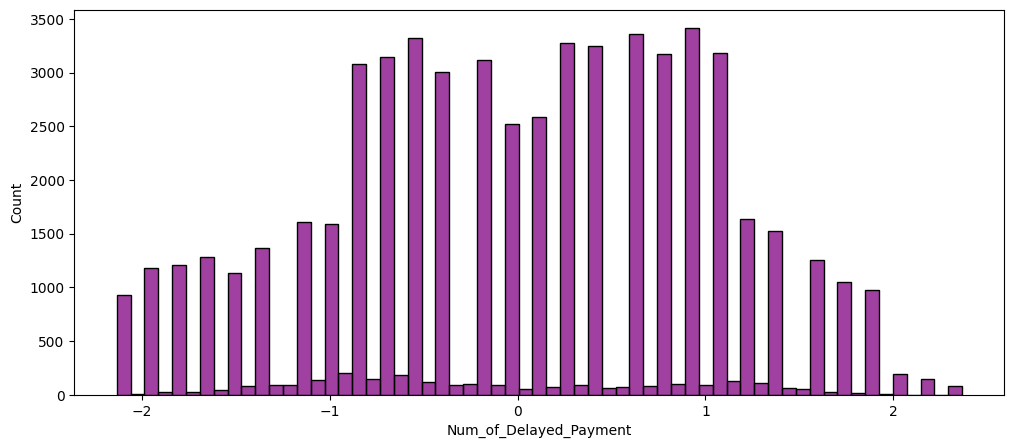

Changed_Credit_Limit


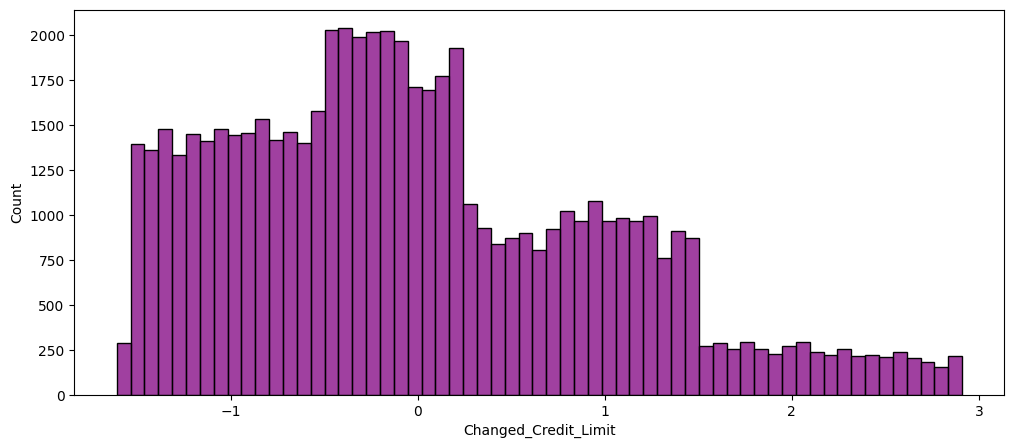

Num_Credit_Inquiries


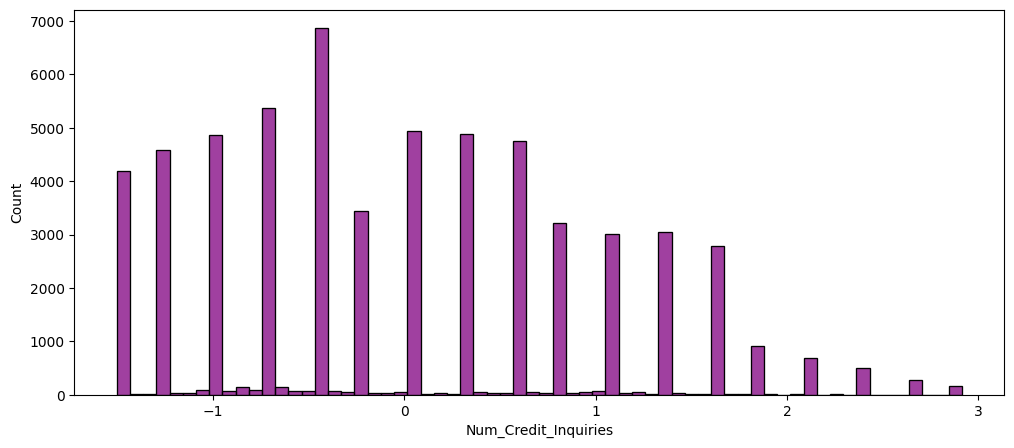

Credit_Mix


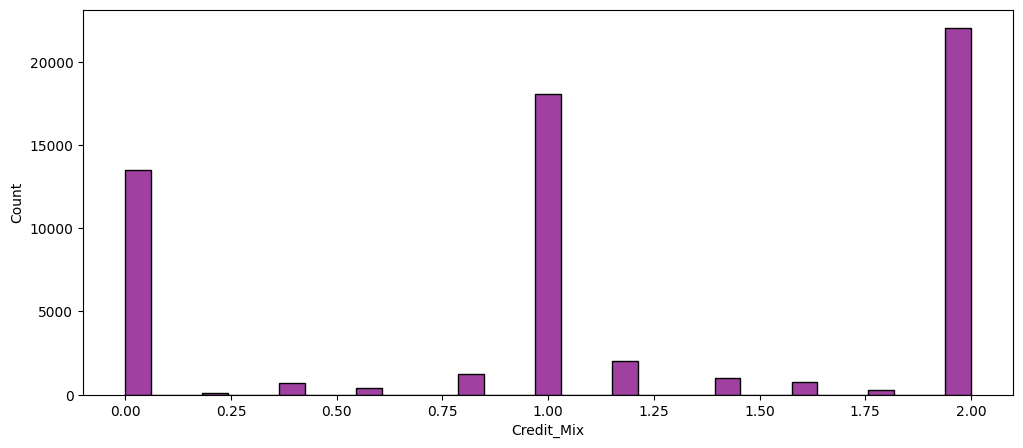

Outstanding_Debt


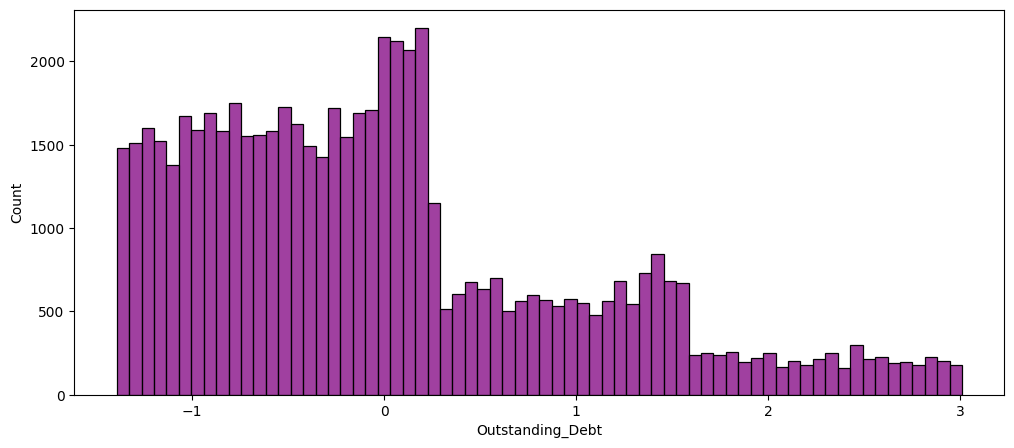

Credit_Utilization_Ratio


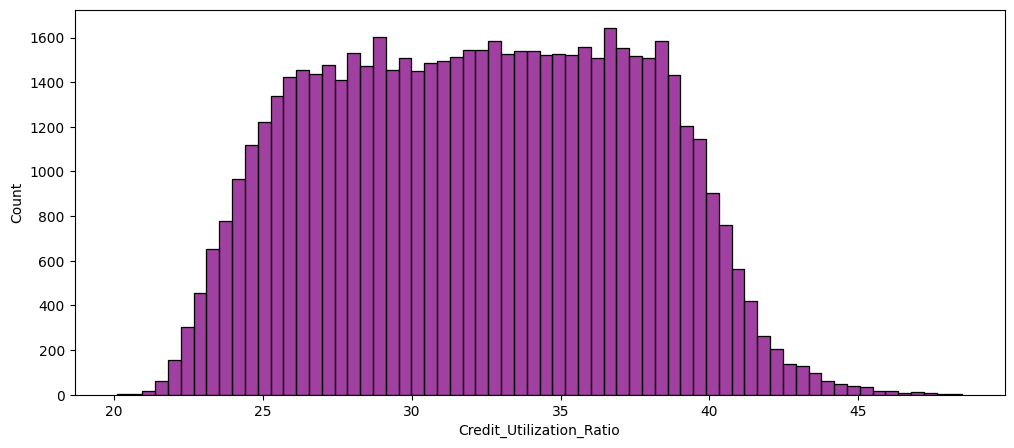

Credit_History_Age


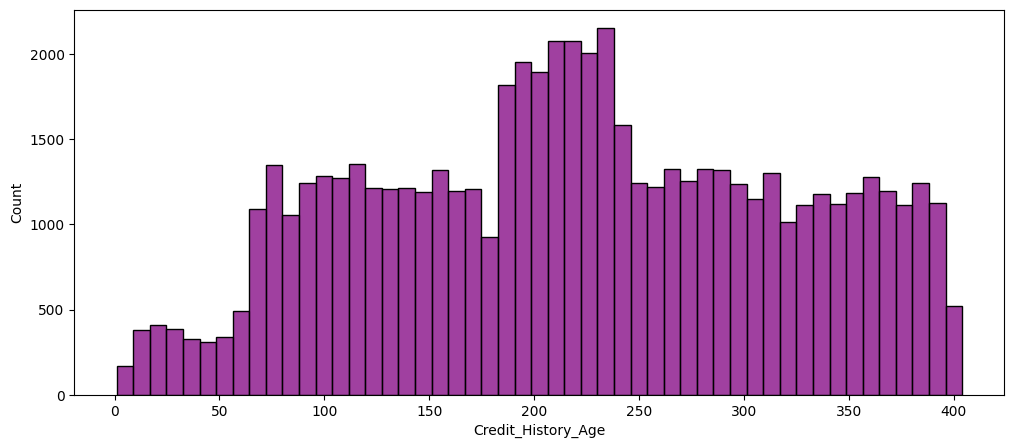

Payment_of_Min_Amount


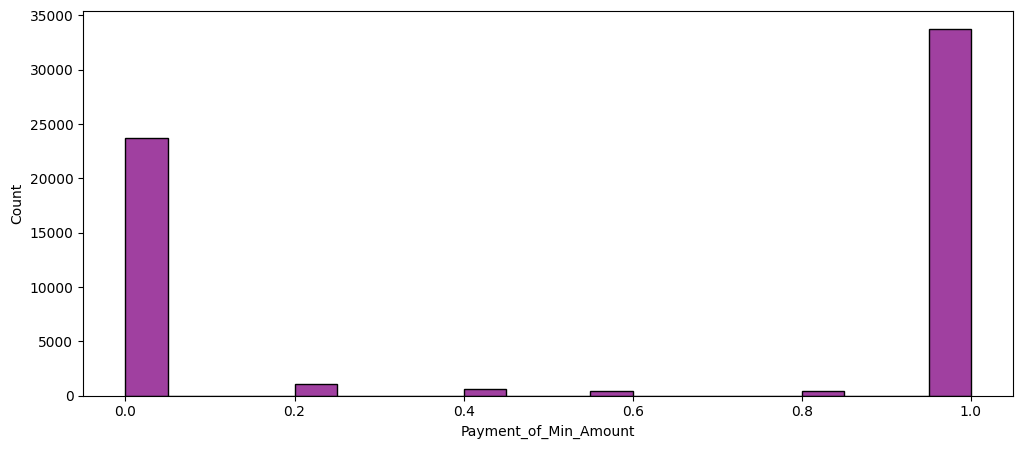

Total_EMI_per_month


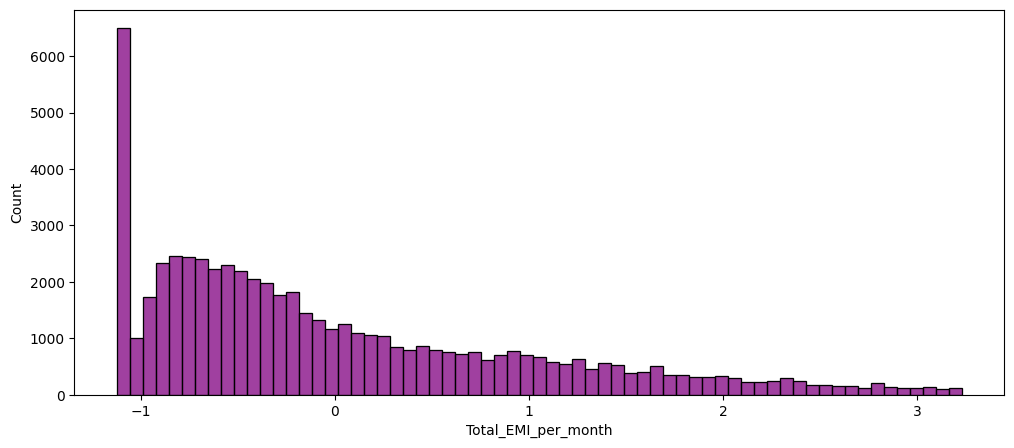

Amount_invested_monthly


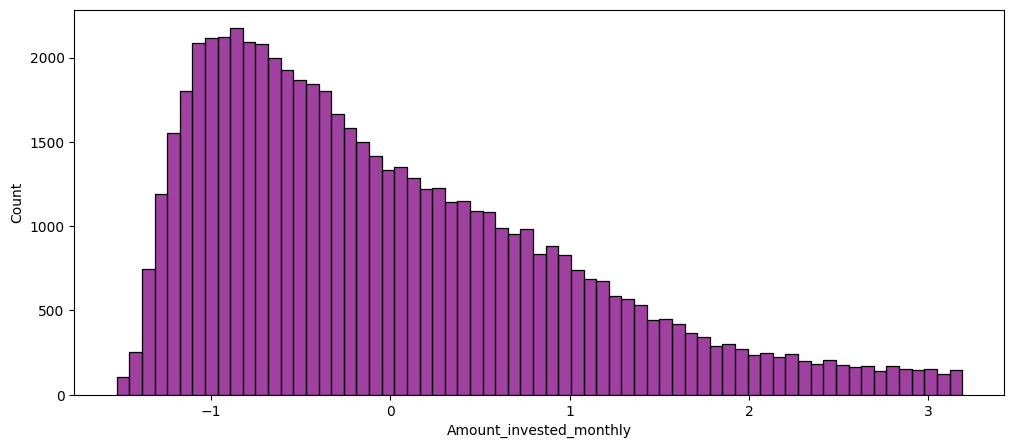

Payment_Behaviour


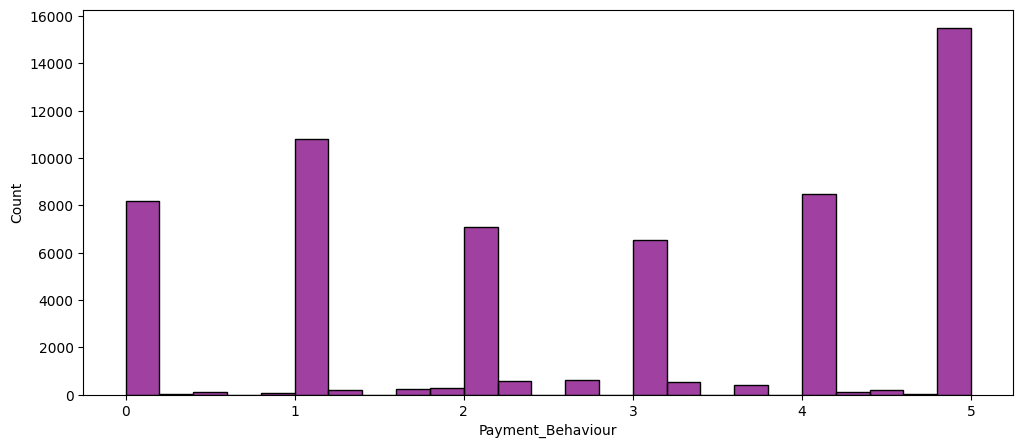

Monthly_Balance


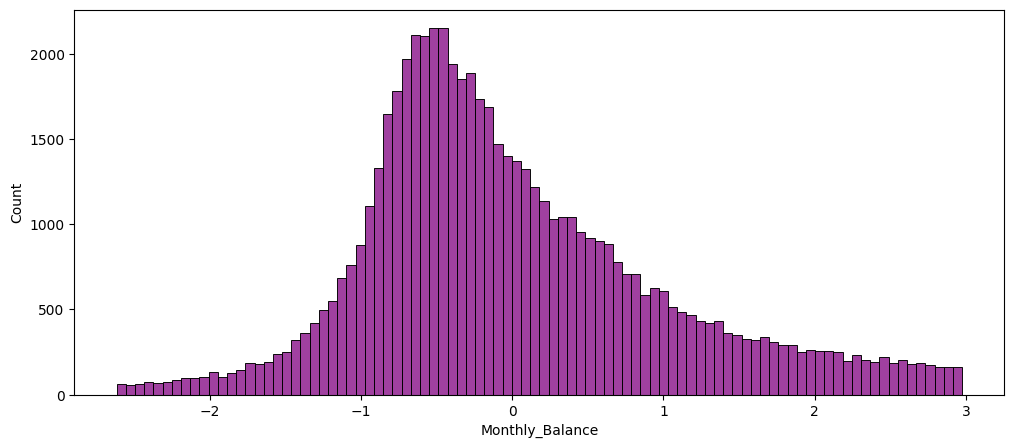

In [ ]:
for col in X_train .select_dtypes('number').columns:
    print(col)
    plt.figure(figsize=(12,5))
    sns.histplot(data=X_train ,x=col,color='purple')
    plt.show()

### visualize heatmap to explain correlation between features and each other and target

In [ ]:
#plt.figure(figsize=(12,9))
#sns.heatmap(pd.concat((X_train.iloc[:,0:20],y_train),axis=1).corr(),annot=True,fmt='.1f')

In [ ]:
X_train.shape

(60000, 21)

## `#` Prepare Test Set

Apply the data transformations you used on the training set to the test set.

**Important Note:** DO NOT use `fit` on the test set.

### encoding valid and test data

In [ ]:
y_test=pd.DataFrame(y_test)
y_test = label_encoder.transform(y_test)
y_valid=pd.DataFrame(y_valid)
y_valid = label_encoder.transform(y_valid)

c:\Users\EL-Huda\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
c:\Users\EL-Huda\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [ ]:
y_valid.shape

(20000,)

In [ ]:

X_valid[['Month','Credit_Mix','Payment_of_Min_Amount','Payment_Behaviour','Occupation']] = ordinal_feature_encoder.transform(X_valid[ordinal_feature])

In [ ]:
X_test[['Month','Credit_Mix','Payment_of_Min_Amount','Payment_Behaviour','Occupation']] = ordinal_feature_encoder.transform(X_test[ordinal_feature])

### fill null in valid and test data

In [ ]:

X_test[X_test.columns] = min_payments_imputer.transform(X_test[X_test.columns])
X_valid[X_valid.columns] = min_payments_imputer.transform(X_valid[X_valid.columns])

### scaling valid and test data

In [ ]:
X_valid[feature] =Quantile_transformer.transform(X_valid[feature])
X_test[feature] =Quantile_transformer.transform(X_test[feature])

### check outlier in valid and test data

In [ ]:
Q1 = X_valid.quantile(0.25)
Q3 = X_valid.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_mask = (X_valid< lower_bound) | (X_valid> upper_bound)

outlier_counts = outliers_mask.sum(axis=0)

total_rows = X_valid.shape[0]
outlier_percentage = (outlier_counts / total_rows) * 100

outliers_summary = pd.DataFrame({
    "Number of Outliers": outlier_counts,
    "Outlier Percentage": outlier_percentage
})

outliers_summary.style.background_gradient()

,Number of Outliers,Outlier Percentage
Month,0,0.000000
Age,0,0.000000
Occupation,0,0.000000
Annual_Income,57,0.285000
Num_Bank_Accounts,0,0.000000
Num_Credit_Card,0,0.000000
Interest_Rate,0,0.000000
Num_of_Loan,0,0.000000
Delay_from_due_date,382,1.910000
Num_of_Delayed_Payment,0,0.000000


In [ ]:
Q1 = X_test.quantile(0.25)
Q3 = X_test.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_mask = (X_test< lower_bound) | (X_test> upper_bound)

outlier_counts = outliers_mask.sum(axis=0)

total_rows = X_test.shape[0]
outlier_percentage = (outlier_counts / total_rows) * 100

outliers_summary = pd.DataFrame({
    "Number of Outliers": outlier_counts,
    "Outlier Percentage": outlier_percentage
})

outliers_summary.style.background_gradient()

,Number of Outliers,Outlier Percentage
Month,0,0.000000
Age,0,0.000000
Occupation,0,0.000000
Annual_Income,42,0.210000
Num_Bank_Accounts,0,0.000000
Num_Credit_Card,0,0.000000
Interest_Rate,0,0.000000
Num_of_Loan,0,0.000000
Delay_from_due_date,374,1.870000
Num_of_Delayed_Payment,0,0.000000




> Use the `keras` from Tensorflow to build ANN model that would fit the credit score data and be able to generalize well.




In [ ]:
xx_train=X_train.copy()
yy_train=y_train.copy()
xx_valid=X_valid.copy()
yy_valid=y_valid.copy()
xx_test=X_test.copy()
yy_test=y_test.copy()

In [ ]:
y_valid.shape
yy_test.shape
y_train.shape

(60000,)

## `i` building layers



In [ ]:
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(xx_train.shape[1],)))
model.add(Dense(256, activation='relu')),
model.add(Dense(128, activation='relu')),
model.add(Dense(128, activation='relu')),
model.add(Dense(64, activation='relu')),
model.add(Dense(64, activation='relu')),
model.add(Dense(32, activation='relu')),
model.add(Dense(32, activation='relu')),
model.add(Dense(16, activation='relu')),
model.add(Dense(16, activation='relu')),
model.add(Dense(3, activation='softmax'))
model.summary()

c:\Users\EL-Huda\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │        11,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 208,403 (814.07 KB)

 Trainable params: 208,403 (814.07 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.utils import to_categorical

yy_train = to_categorical(y_train, num_classes=3)
yy_valid = to_categorical(y_valid, num_classes=3)
yy_test = to_categorical(y_test, num_classes=3)

In [ ]:
yy_train.shape

(60000, 3)

In [ ]:
model.compile(keras.optimizers.Adam(learning_rate=0.00001), loss='categorical_crossentropy', metrics=['accuracy', 'Precision'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_accuracy',
                               patience=15,
                               restore_best_weights=True)

In [ ]:
xx_train.shape

(60000, 21)

In [ ]:
yy_train.shape

(60000, 3)

In [ ]:
history = model.fit(x=xx_train,
                    y=yy_train,
                    validation_data=(xx_valid, yy_valid),
                    batch_size=16,
                    epochs=100,
                    verbose=1,
                    callbacks=[early_stopping])

Epoch 1/100
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 39s 8ms/step - Precision: 0.5644 - accuracy: 0.5334 - loss: 0.9491 - val_Precision: 0.6337 - val_accuracy: 0.6127 - val_loss: 0.8187
Epoch 2/100
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 30s 8ms/step - Precision: 0.6517 - accuracy: 0.6271 - loss: 0.8158 - val_Precision: 0.6616 - val_accuracy: 0.6410 - val_loss: 0.7830
Epoch 3/100
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 29s 8ms/step - Precision: 0.6655 - accuracy: 0.6437 - loss: 0.7833 - val_Precision: 0.6855 - val_accuracy: 0.6603 - val_loss: 0.7600
Epoch 4/100
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 28s 8ms/step - Precision: 0.6716 - accuracy: 0.6489 - loss: 0.7799 - val_Precision: 0.6824 - val_accuracy: 0.6604 - val_loss: 0.7616
Epoch 5/100
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 28s 7ms/step - Precision: 0.6781 - accuracy: 0.6546 - loss: 0.7688 - val_Precision: 0.6895 - val_accuracy: 0.6667 - val_loss: 0.7475
Epoch 6/100
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 26s 7ms/step - Precision: 0.6827 - accuracy: 0.6564 - loss: 0.7609 - val_Prec

In [ ]:
model.evaluate(xx_train,yy_train)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - Precision: 0.7467 - accuracy: 0.6973 - loss: 0.6855


[0.6835629940032959, 0.7487523555755615, 0.6983333230018616]

In [ ]:
model.evaluate(xx_test,yy_test)

625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Precision: 0.7442 - accuracy: 0.6944 - loss: 0.6892


[0.6920105814933777, 0.7412992119789124, 0.690750002861023]

In [ ]:
y_pred=model.predict(xx_test)

625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


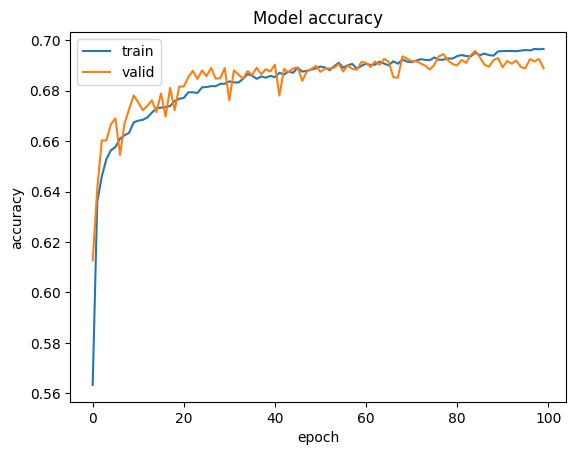

In [ ]:
plt.plot(history.history['accuracy'],label='train')
plt.plot(history.history['val_accuracy'],label='valid')
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.title("Model accuracy")
plt.legend()

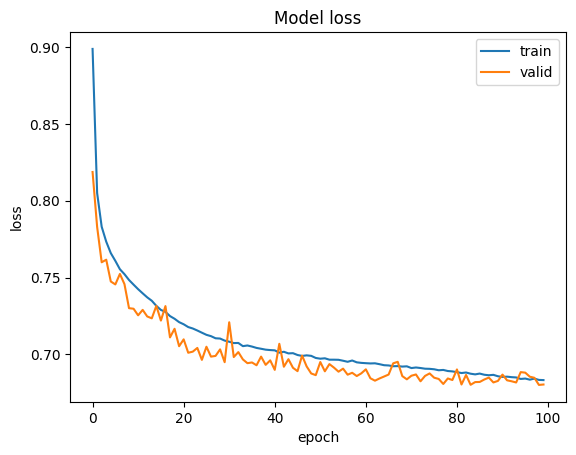

In [ ]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='valid')
plt.xlabel("epoch")
plt.ylabel("loss")
plt.title("Model loss")
plt.legend()

----------------------------------------------

$$ Wish \space you \space all \space the \space best \space ♡ $$
$$ Abdelrahman \space Eid $$